Predicting the future sales of a producr helps a business manage the manufactering and advertising cost of the product. The dataset contains data about the sales of a product. Columns in the dataste are:

1. TV: costs for advertising on Tv
2. Radio: radio advertising costs.
3. Newspaper: newspaper advertising costs
4. Sales: Number of units sold.



In [32]:
import pandas as pd

df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [33]:
df.shape

(200, 4)

In [34]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


check for missisng values

In [35]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [36]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

some exploratory data analysis

visualize relationship between tv advertisement and units sold

In [37]:
import plotly.express as px
import plotly.graph_objects as go

figure = px.scatter(df, x= "Sales", y= "TV", trendline= "ols")
figure.show()

using matplotlib

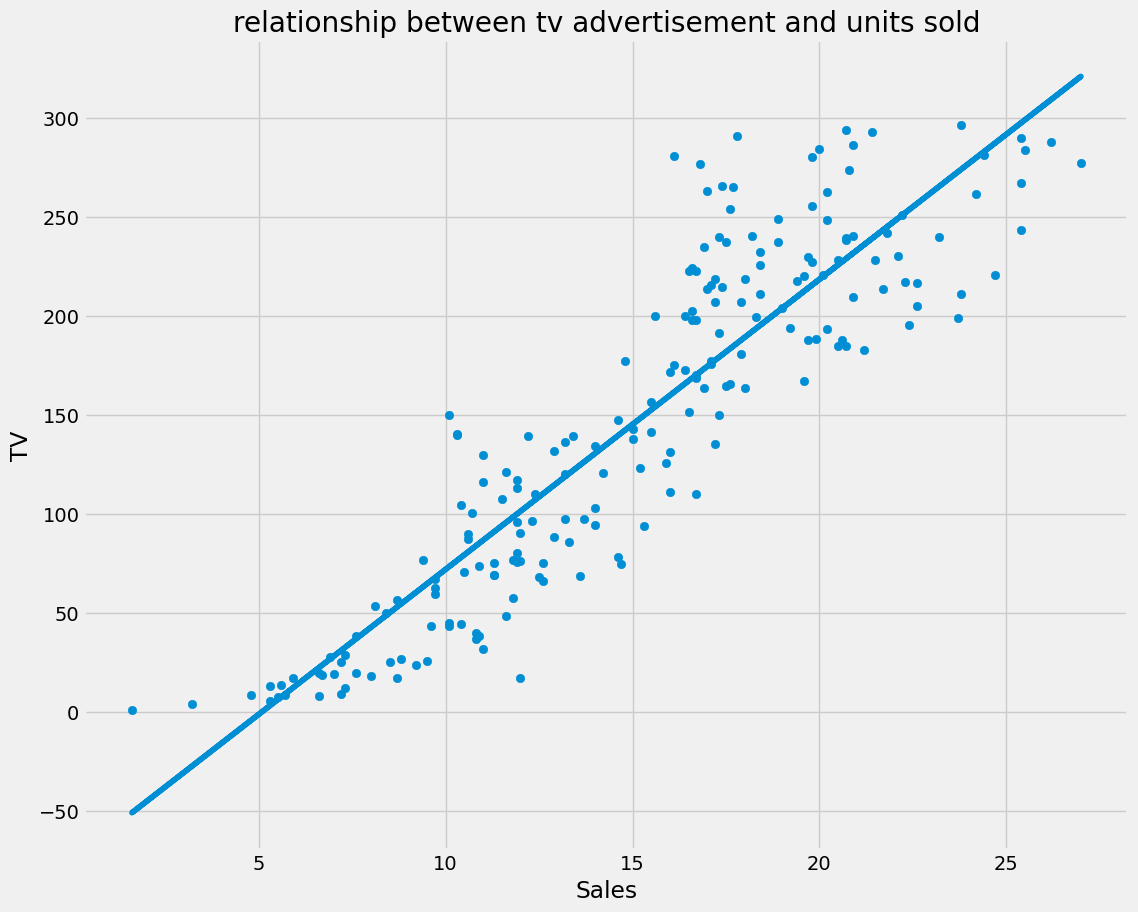

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize= (12, 10))
plt.xlabel("Sales")
plt.ylabel("TV")
plt.title("relationship between tv advertisement and units sold")
plt.scatter(df.Sales, df.TV)

# add trendline
z = np.polyfit(df.Sales, df.TV, 1)
p = np.poly1d(z)
plt.plot(df.Sales, p(df.Sales))
plt.show()

newspapers and units sold

In [39]:
figure = px.scatter(df, x= "Sales", y= "Newspaper", trendline= "ols")
figure.show()

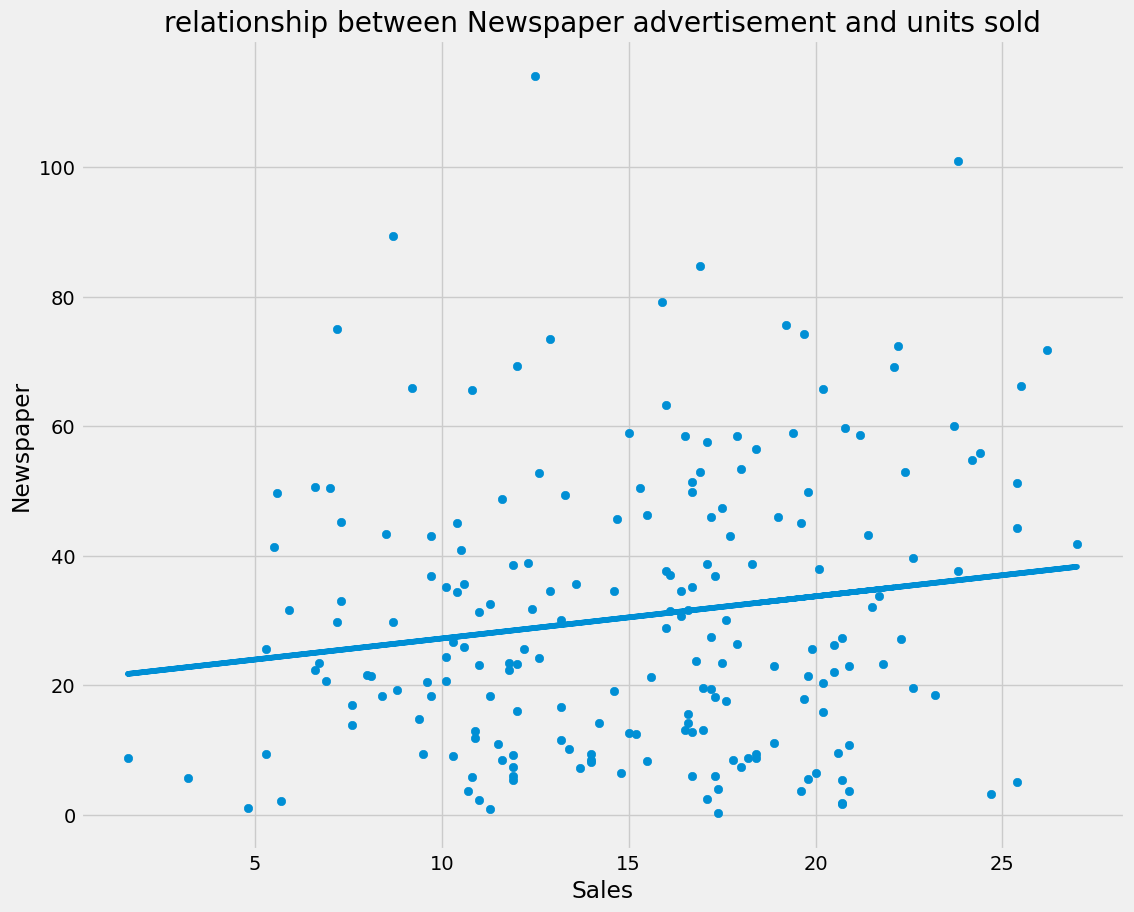

In [40]:
plt.figure(figsize= (12, 10))
plt.xlabel("Sales")
plt.ylabel("Newspaper")
plt.title("relationship between Newspaper advertisement and units sold")
plt.scatter(df.Sales, df.Newspaper)

# add trendline
z = np.polyfit(df.Sales, df.Newspaper, 1)
p = np.poly1d(z)
plt.plot(df.Sales, p(df.Sales))
plt.show()

In [41]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

radio vs sales


In [42]:
figure = px.scatter(df, x= "Sales", y= "Radio", trendline= "ols")
figure.show()

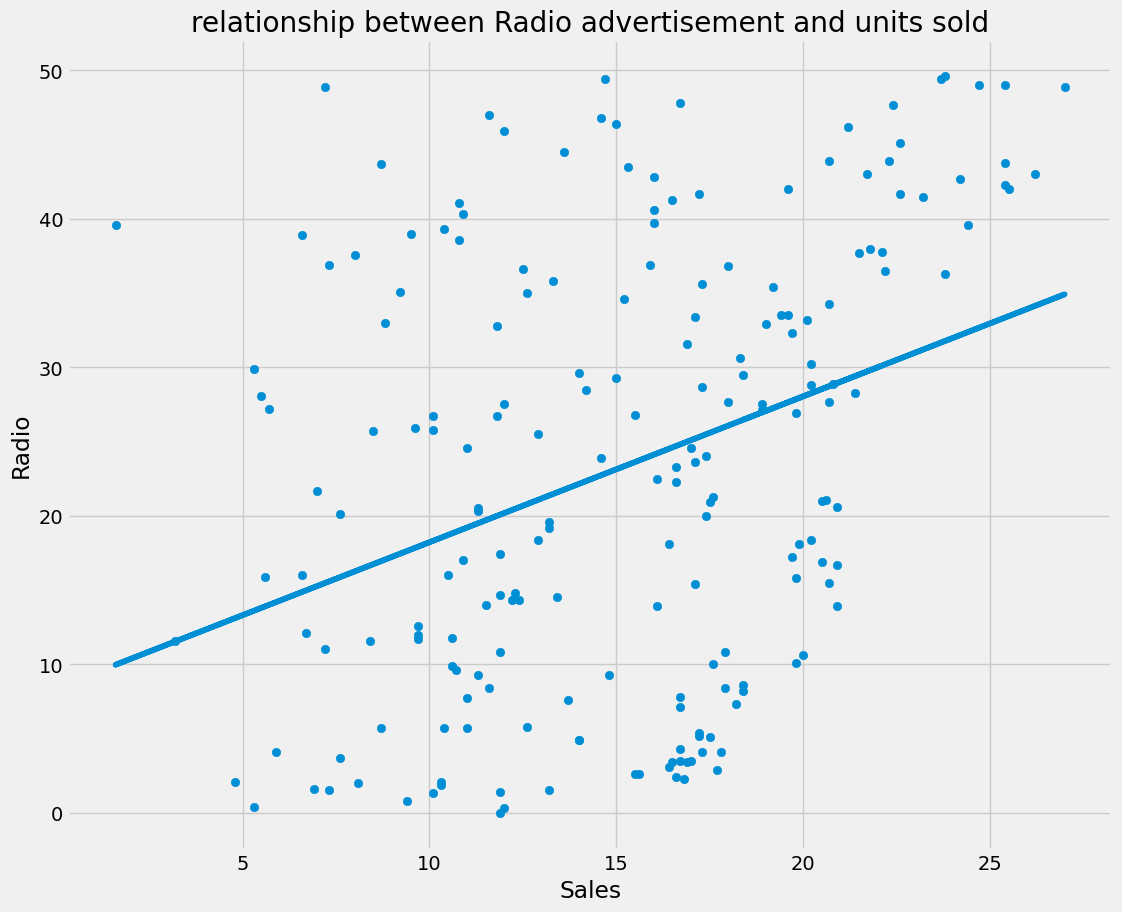

In [43]:
plt.figure(figsize= (12, 10))
plt.xlabel("Sales")
plt.ylabel("Radio")
plt.title("relationship between Radio advertisement and units sold")
plt.scatter(df.Sales, df.Radio)

# add trendline
z = np.polyfit(df.Sales, df.Radio, 1)
p = np.poly1d(z)
plt.plot(df.Sales, p(df.Sales))
plt.show()

distribution of sales

In [44]:
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

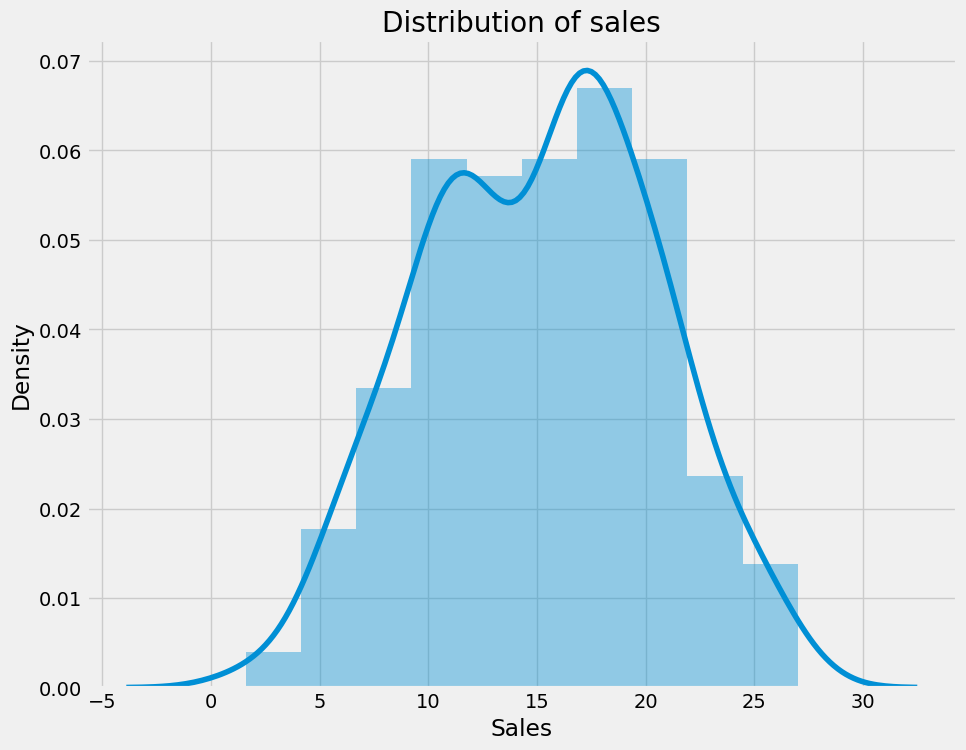

In [45]:

plt.figure(figsize= (10, 8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of sales")
sn.distplot(df["Sales"])
plt.show()

a fairly normal distribution of sales

have a look at the various advertising modes numbers

In [46]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [47]:
tv = df.TV.sum()
radio = df.Radio.sum()
newspaper = df.Newspaper.sum()

label = ["tv", "radio", "newspaper"]
values = [tv, radio, newspaper]

fig = px.pie(df, values= values, names= label, title= "various advertising modes numbers")
fig.show()

it is quite evident that tv is the most preferred mode of advertisment with 73.2% share

correlation of sales with the modes of advertisment

In [48]:
correlation = df.corr()
print(correlation.Sales.sort_values(ascending= False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


<AxesSubplot:>

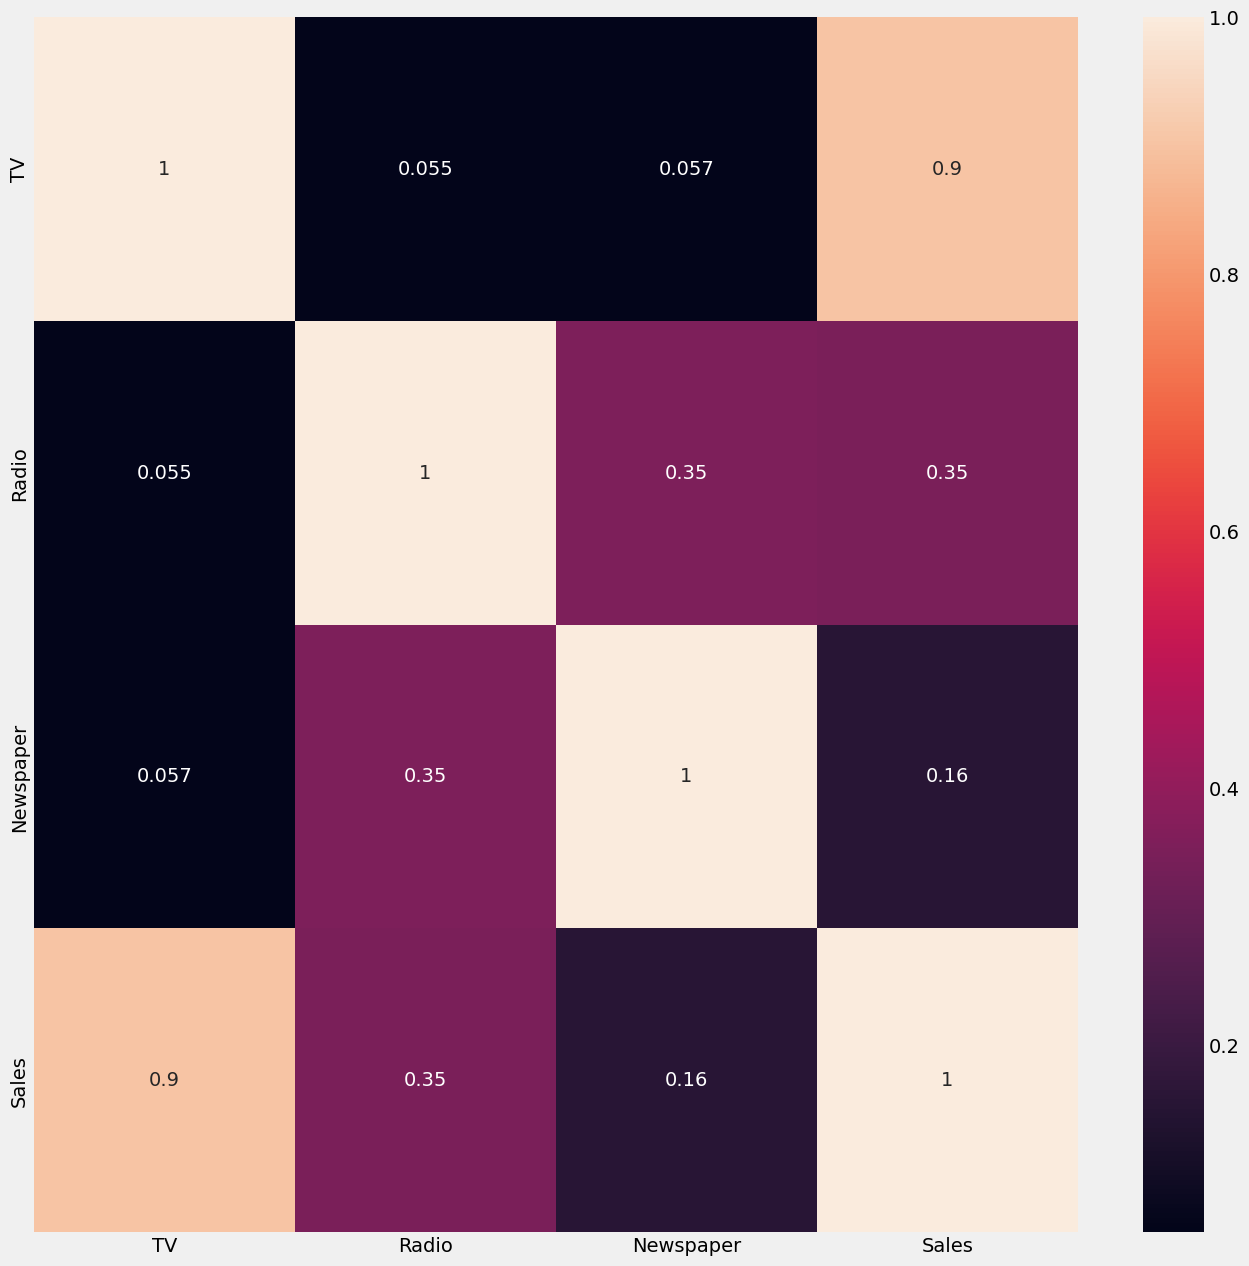

In [49]:
plt.figure(figsize= (15, 15))
sn.heatmap(correlation, annot= True)

tv has the highest correlation with sales hence we can conclude it has the greatest impact on sales

## Model Building

In [50]:
df.shape

(200, 4)

In [51]:
X = df.drop("Sales", axis= 1)
y = df.Sales

In [52]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [53]:
#train test split

from sklearnex.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [54]:
X_train.shape

(160, 3)

In [55]:
X_test.shape

(40, 3)

In [56]:
y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [57]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

In [58]:
# import required 
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import PassiveAggressiveRegressor

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [59]:
# evaluate the best classifier using a function
# hyper parameter tuning

def find_best_model_using_gridsearchcv(X_train, y_train):
    algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params':{
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'PassiveAggressiveRegressor': {
        'model': PassiveAggressiveRegressor(),
        'params':{
                'C' : np.logspace(-4, 4, 20),
                'fit_intercept': [True, False],
                'early_stopping': [True, False],
                'shuffle': [True, False],
                'epsilon': np.logspace(-4, 4, 20),
                'warm_start': [True, False],
                'average': [True, False]
        }
    },# dt classifier
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
            }
        },
    'XGBoost': {
          'model': XGBClassifier(),
          'params': {
              'min_child_weight': [1, 5, 10],
              'gamma': [0.5, 1],
              'subsample': [0.6, 0.8, 1.0],
              'max_depth': [3, 5]
            }
       },
      
       'RandomForestClassifier' : {
           'model' : RandomForestRegressor(),
           'params' : {
               'n_estimators' : list(range(10,101,10)),
               'max_features' : ['auto', 'sqrt', 'log2'],
               'criterion' : ['squared_error', 'absolute_error', 'poisson']
           }
       }

    }


    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
    # for loop
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv= cv, return_train_score= False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])

In [60]:

find_best_model_using_gridsearchcv(X_train, y_train)

[11:33:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:33:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:04] WARNI

,model,best_score,best_params
0,linear_regression,0.857533,{'normalize': True}
1,lasso,0.857989,"{'alpha': 1, 'selection': 'random'}"
2,PassiveAggressiveRegressor,0.791199,"{'C': 0.004832930238571752, 'average': False, ..."
3,decision_tree,0.901276,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
4,XGBoost,NaN,"{'gamma': 0.5, 'max_depth': 3, 'min_child_weig..."
5,RandomForestClassifier,0.918432,"{'criterion': 'absolute_error', 'max_features'..."


the best classifier is the random forest regressor with 0.918432 score

In [61]:
rf = RandomForestRegressor(criterion= "absolute_error", max_features= 'auto')
rf

RandomForestRegressor(criterion='absolute_error')

In [64]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test);y_pred

array([17.448, 22.524, 19.864,  6.712, 22.879, 13.675, 22.48 ,  9.685,
       16.86 , 17.082,  7.566, 10.528, 17.382,  4.169, 11.666, 17.007,
        6.41 , 17.506, 11.838, 19.589, 19.86 , 13.064, 10.216, 21.953,
       10.792, 10.262, 22.509, 12.662, 11.663,  5.198, 16.545, 10.933,
       23.125,  9.206, 19.837, 19.817, 11.74 , 19.582, 12.46 ,  7.474])

In [65]:
rf.score(X_test, y_test)

0.9529304248068837

evaluate using corss_val_score

In [67]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits= 10)
score = cross_val_score(rf, X_train, y_train, cv= kf)
score.mean()

0.9145802326307532

## function to predict 

In [71]:
X.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [76]:
def sales(TV, Radio, Newspaper):
    x = np.zeros(len(X.columns))

    x[0] = TV
    x[1] = Radio
    x[2] = Newspaper

    d = rf.predict([x])[0]

    return d

In [77]:
sales(45, 55, 494)

12.380000000000003

try with user input

In [78]:
print("Please enter advertisment figures for tv, radio and newspaper to see possible sales outcome!!")
TV = float(input("TV figures: "))
Radio = float(input("Radio figures: "))
Newspaper = float(input("Newspaper figures: "))
predicted_sales = sales(TV, Radio, Newspaper)
print("Expected Sales: ", predicted_sales)

Please enter advertisment figures for tv, radio and newspaper to see possible sales outcome!!
Expected Sales:  12.380000000000003


In [79]:
# export model to pickle file
import pickle
with open('sales.pickle', 'wb') as f:
  pickle.dump(rf, f)